In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('../data/reviews-com.tsel.telkomselku_12-31-2024_231721.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9f41f2f8-9a8d-4e33-87b5-ebc5be92c43c,winda selvia,https://play-lh.googleusercontent.com/a-/ALV-U...,Sangat2 buruk Uda lama aku menunggu loding2 tr...,1,0,3.1.0,2024-12-30 21:19:44,NaN,NaN,3.1.0
1,cbac7961-7979-458d-9d23-7fe7cda09fc3,Abdul Khalik,https://play-lh.googleusercontent.com/a-/ALV-U...,👌,5,0,3.1.0,2024-12-30 20:44:50,NaN,NaN,3.1.0
2,c431e5f7-ce9c-4d0f-80dd-e1e225675cfb,Defandra,https://play-lh.googleusercontent.com/a/ACg8oc...,Okh,5,0,3.1.0,2024-12-30 20:29:25,NaN,NaN,3.1.0
3,2ae4df5a-7416-4a26-81c4-f6ec74ea89bf,Arrahman Nulkarim,https://play-lh.googleusercontent.com/a/ACg8oc...,App tekcl besic sdh sy daunload tp sayang susa...,1,0,3.1.0,2024-12-30 18:12:31,NaN,NaN,3.1.0
4,bac07a00-b04c-488d-bb7b-92919c2f98a8,Alex Turner Mayer,https://play-lh.googleusercontent.com/a-/ALV-U...,Masak mau beli paketan login melulu.,1,0,NaN,2024-12-30 15:34:08,NaN,NaN,NaN


In [3]:
df.shape

(49998, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              49998 non-null  object 
 1   userName              49998 non-null  object 
 2   userImage             49998 non-null  object 
 3   content               49997 non-null  object 
 4   score                 49998 non-null  int64  
 5   thumbsUpCount         49998 non-null  int64  
 6   reviewCreatedVersion  31034 non-null  object 
 7   at                    49998 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            31034 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.2+ MB


In [5]:
df.describe()

,score,thumbsUpCount,replyContent,repliedAt
count,49998.000000,49998.000000,0.0,0.0
mean,2.572223,1.996720,NaN,NaN
std,1.817353,27.656096,NaN,NaN
min,1.000000,0.000000,NaN,NaN
25%,1.000000,0.000000,NaN,NaN
50%,1.000000,0.000000,NaN,NaN
75%,5.000000,0.000000,NaN,NaN
max,5.000000,1812.000000,NaN,NaN


## Handling Incorrect Datatype

In [6]:
df_cleaned = df.copy()

In [7]:
df_cleaned['at'] = pd.to_datetime(df_cleaned['at'])

## Handling Missing Value

In [8]:
df_cleaned.isna().sum()

reviewId                    0
userName                    0
userImage                   0
content                     1
score                       0
thumbsUpCount               0
reviewCreatedVersion    18964
at                          0
replyContent            49998
repliedAt               49998
appVersion              18964
dtype: int64

In [9]:
df_cleaned[df_cleaned['appVersion'].isnull()]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
4,bac07a00-b04c-488d-bb7b-92919c2f98a8,Alex Turner Mayer,https://play-lh.googleusercontent.com/a-/ALV-U...,Masak mau beli paketan login melulu.,1,0,NaN,2024-12-30 15:34:08,NaN,NaN,NaN
7,d03ab1f4-2f4f-45f7-b187-87bc6a1fea14,Man cep,https://play-lh.googleusercontent.com/a-/ALV-U...,Ok,5,0,NaN,2024-12-30 07:33:55,NaN,NaN,NaN
8,f3dc0309-4da7-49e4-a1c8-1ff414619727,alevs elatea,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tampilan nominal kuota tidak akurat, aplikasi ...",2,0,NaN,2024-12-30 03:31:03,NaN,NaN,NaN
12,68bf0017-5649-4704-939c-03f31ff094d6,Say Yang,https://play-lh.googleusercontent.com/a/ACg8oc...,Kenapa sih pas saya download apk ini pulsa say...,1,0,NaN,2024-12-29 22:43:42,NaN,NaN,NaN
13,5dc983a8-39d8-4f14-a376-147de0bf8f72,Boy Tjahyadi Herman (Ko Boy),https://play-lh.googleusercontent.com/a-/ALV-U...,Good apps,5,0,NaN,2024-12-29 21:23:57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
49963,1ea67313-2eb2-4992-9178-379157f15b0f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,menyenankan,5,0,NaN,2020-01-21 04:29:18,NaN,NaN,NaN
49970,a2499faa-f3e6-4701-b473-04e4795aab27,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,1 aja dulu karna tak bisa di buka,1,5,NaN,2020-01-21 04:06:55,NaN,NaN,NaN
49973,c6528276-2e07-445c-8346-b64c2b13c3c8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Waduh tidak semua perangkat android bisa pakai...,1,6,NaN,2020-01-21 03:46:18,NaN,NaN,NaN
49993,069aea1a-25b2-4c2a-a6f2-311fdd6ba2d9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ksh 3 dulu,4,0,NaN,2020-01-21 01:56:29,NaN,NaN,NaN


Pertama, saya akan menangani missing value pada kolom reviewCreatedVersion & appVersion. Di sini, baris yang tidak memiliki nilai di kedua kolom tersebut akan saya isi dengan value baris di atasnya (backward fill) dengan asumsi karena waktu pemberian review akan berkorelasi dengan versi aplikasi yang di-review.

In [10]:
# If there are still missing values, you can use backward fill as a fallback
df_cleaned['reviewCreatedVersion'] = df_cleaned['reviewCreatedVersion'].fillna(method='bfill')
df_cleaned['appVersion'] = df_cleaned['appVersion'].fillna(method='bfill')

C:\Users\ILHAM\AppData\Local\Temp\ipykernel_15748\1948888087.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned['reviewCreatedVersion'] = df_cleaned['reviewCreatedVersion'].fillna(method='bfill')
C:\Users\ILHAM\AppData\Local\Temp\ipykernel_15748\1948888087.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned['appVersion'] = df_cleaned['appVersion'].fillna(method='bfill')


Kolom 'replyContent' dan 'repliedAt' akan di-drop karena semua baris tidak memiliki value.

In [11]:
df_cleaned = df_cleaned.drop(['replyContent', 'repliedAt'], axis=1)

In [12]:
df_cleaned.isna().sum()

reviewId                0
userName                0
userImage               0
content                 1
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
dtype: int64

## Remove Duplicates

In [13]:
df_cleaned.drop_duplicates()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,9f41f2f8-9a8d-4e33-87b5-ebc5be92c43c,winda selvia,https://play-lh.googleusercontent.com/a-/ALV-U...,Sangat2 buruk Uda lama aku menunggu loding2 tr...,1,0,3.1.0,2024-12-30 21:19:44,3.1.0
1,cbac7961-7979-458d-9d23-7fe7cda09fc3,Abdul Khalik,https://play-lh.googleusercontent.com/a-/ALV-U...,👌,5,0,3.1.0,2024-12-30 20:44:50,3.1.0
2,c431e5f7-ce9c-4d0f-80dd-e1e225675cfb,Defandra,https://play-lh.googleusercontent.com/a/ACg8oc...,Okh,5,0,3.1.0,2024-12-30 20:29:25,3.1.0
3,2ae4df5a-7416-4a26-81c4-f6ec74ea89bf,Arrahman Nulkarim,https://play-lh.googleusercontent.com/a/ACg8oc...,App tekcl besic sdh sy daunload tp sayang susa...,1,0,3.1.0,2024-12-30 18:12:31,3.1.0
4,bac07a00-b04c-488d-bb7b-92919c2f98a8,Alex Turner Mayer,https://play-lh.googleusercontent.com/a-/ALV-U...,Masak mau beli paketan login melulu.,1,0,3.1.0,2024-12-30 15:34:08,3.1.0
...,...,...,...,...,...,...,...,...,...
49993,069aea1a-25b2-4c2a-a6f2-311fdd6ba2d9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ksh 3 dulu,4,0,1.0.0,2020-01-21 01:56:29,1.0.0
49994,57c20994-9aa5-4cf6-8369-811596227816,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Cukup bagus,5,0,1.0.0,2020-01-21 01:55:16,1.0.0
49995,a75693d2-364a-4ec4-8c67-3508eb985a8c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantap lah... Transaksi jadi lebih mudah,5,0,1.0.0,2020-01-21 01:54:01,1.0.0
49996,a2378b63-4098-4e28-80fe-176949548b10,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa paketan malam tidak tercantum ya ?,4,11,1.0.0,2020-01-21 01:10:09,1.0.0


In [14]:
len(df_cleaned['reviewId'].unique())

49998

Oh ternyata tidak ada baris duplikat pada data ini, bagus.

In [15]:
df_cleaned.to_csv('../data/cleaned_reviews-com.tsel.telkomselku_12-31-2024_231721.csv', index=False)

## Exploratory Data Analysis

In [16]:
eda_data = df_cleaned.copy()

### Distribution of Scores

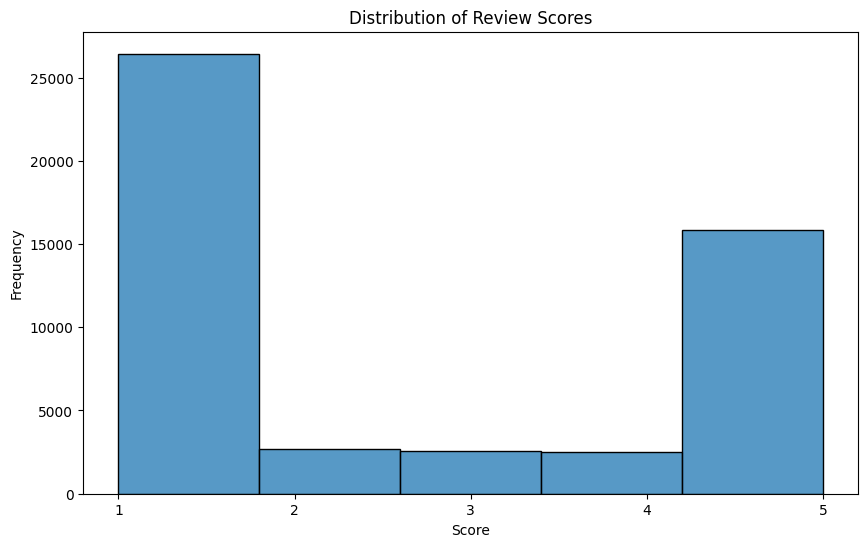

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(eda_data['score'], bins=5)
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.show()


### Average Score Trends Over Time (by AppVersion)

   appVersion     score
0       1.0.0  2.536711
1       1.0.1  2.755444
2       1.0.2  3.135162
3       1.1.0  3.071736
4       1.1.1  2.616724
5       1.2.0  2.769090
6       1.3.0  2.442834
7       2.0.0  2.299283
8       3.0.0  2.861685
9       3.0.1  2.702703
10      3.0.2  4.289871
11      3.1.0  3.151079


C:\Users\ILHAM\AppData\Local\Temp\ipykernel_15748\3875762404.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_score_by_version, x='appVersion', y='score', palette='viridis')


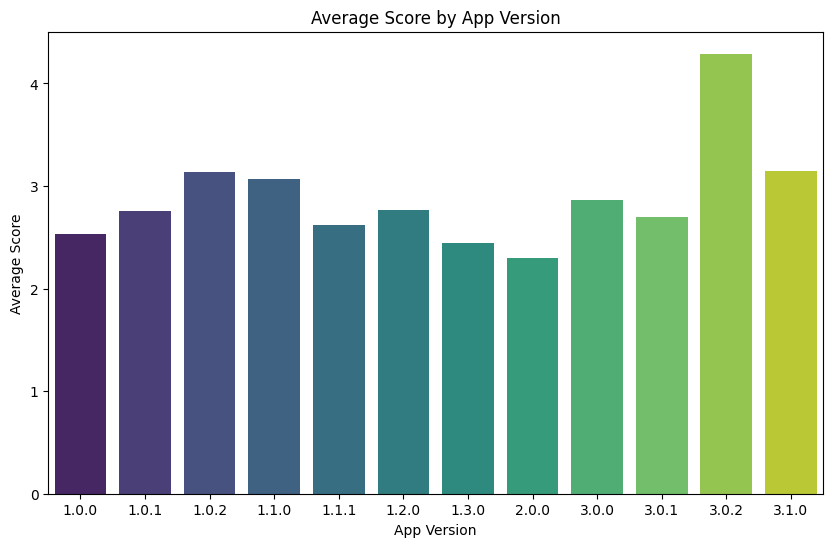

In [18]:
# Calculate the average score for each app version
average_score_by_version = eda_data.groupby('appVersion')['score'].mean().reset_index()

# Display the result
print(average_score_by_version)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_score_by_version, x='appVersion', y='score', palette='viridis')

# Set title and labels
plt.title('Average Score by App Version')
plt.xlabel('App Version')
plt.ylabel('Average Score')

# Show the plot
plt.show()

### Average Score Trends Over Time (by Year Date)

C:\Users\ILHAM\AppData\Local\Temp\ipykernel_15748\3217413743.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  average_score_by_month = eda_data.groupby(pd.Grouper(key='at', freq='M'))['score'].mean().reset_index()


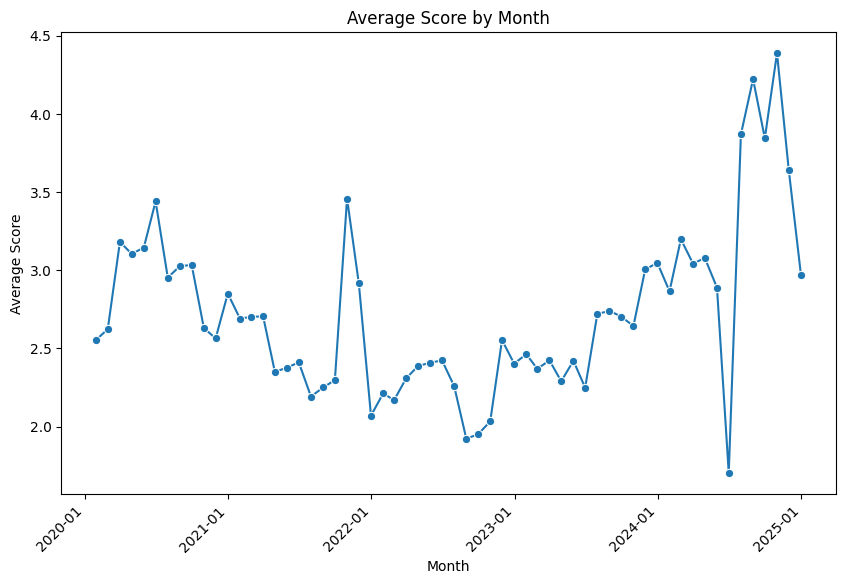

In [19]:
# Calculate the average score for each month
average_score_by_month = eda_data.groupby(pd.Grouper(key='at', freq='M'))['score'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_score_by_month, x='at', y='score', marker='o')

# Set title and labels
plt.title('Average Score by Month')
plt.xlabel('Month')
plt.ylabel('Average Score')

# Format x-axis to show month and year
plt.xticks(rotation=45, ha='right')

# Set x-axis major locator to show all months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Show the plot
plt.show()